In [31]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Для цієї вправи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на Kaggle.com. Завантажте файл csv за посиланням і перемістіть його в ту саму директорію, де знаходиться ваш робочий ноутбук (для зручності

books_data.head()

In [32]:
books_data = pd.read_csv('bestsellers with categories.csv')
books_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [33]:
books_data.shape

(550, 7)

In [34]:
# remove duplicates by name
books_data = books_data.drop_duplicates(subset='Name')

In [35]:
books_data.shape

(351, 7)

Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [36]:
books_data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

## Первинне дослідження даних

In [37]:
books_data.dtypes

name            object
author          object
user_rating    float64
reviews          int64
price            int64
year             int64
genre           object
dtype: object

In [38]:
books_data_nans = books_data.isna().sum()
books_data_nans

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [39]:
unique_genres = books_data["genre"].unique()
unique_genres

array(['Non Fiction', 'Fiction'], dtype=object)

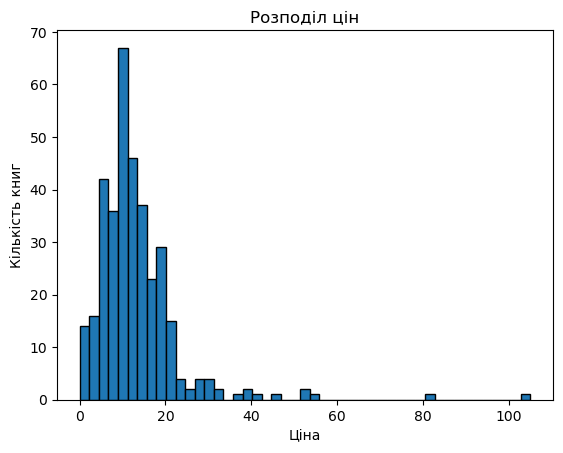

In [40]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
books_data['price'] = pd.to_numeric(books_data['price'], errors='coerce')
books_data['price'].plot(kind='hist', bins='fd', edgecolor='black' )
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.show()

In [41]:
price_stats = books_data['price'].agg(['max', 'min', 'mean', 'median'])
price_stats

max       105.000000
min         0.000000
mean       13.076923
median     12.000000
Name: price, dtype: float64

## Первинне дослідження даних (Summary)

In [42]:
print(f'Про скільки книг зберігає дані датасет?\n\tВідповідь: {books_data.shape[0]}')
print(f'Чи є в якихось змінних пропуски?\n\tВідповідь: {"Так" if books_data_nans.sum() !=0 else "Ні"}')
print(f'Які є унікальні жанри?\n\tВідповідь:  {", ".join(unique_genres)}')
print(f'Максимальна ціна?\n\tВідповідь: {price_stats[0]}')
print(f'Мінімальна ціна?\n\tВідповідь: {price_stats[1]}')
print(f'Середня ціна?\n\tВідповідь: {price_stats[2].round(3)}')
print(f'Медіанна ціна?\n\tВідповідь: {price_stats[3]}')


Про скільки книг зберігає дані датасет?
	Відповідь: 351
Чи є в якихось змінних пропуски?
	Відповідь: Ні
Які є унікальні жанри?
	Відповідь:  Non Fiction, Fiction
Максимальна ціна?
	Відповідь: 105.0
Мінімальна ціна?
	Відповідь: 0.0
Середня ціна?
	Відповідь: 13.077
Медіанна ціна?
	Відповідь: 12.0


## Пошук та сортування даних

In [43]:
# Який рейтинг у датасеті найвищий?
max_rating = books_data['user_rating'].max()
max_rating

4.9

In [44]:
# Скільки книг мають такий рейтинг?
books_max_rating = (books_data[books_data['user_rating'] == max_rating])
books_max_rating_count = len(books_max_rating)
books_max_rating_count

28

In [45]:
# Яка книга має найбільше відгуків?
max_reviews = books_data['reviews'].max()
book_with_max_reviews = books_data[books_data['reviews']==max_reviews]
book_with_max_reviews

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [46]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
year = 2015
top_50_year = books_data[books_data['year'] == year].sort_values(by='price', ascending=False).head(50)
max_price = top_50_year['price'].max()
book_with_max_price_year = top_50_year[top_50_year['price'] == max_price]
book_with_max_price_year

,name,author,user_rating,reviews,price,year,genre
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


In [47]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? 
year = 2010
genre = 'Fiction'
top_50_year = books_data[books_data['year'] == year].sort_values(by='price', ascending=False).head(50)
genre_in_top_50_year = top_50_year[top_50_year['genre']== genre]
genre_in_top_50_year_count = len(genre_in_top_50_year)
genre_in_top_50_year_count

17

In [48]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
years = [2010, 2011]
rating = 4.9
books_with_rating_in_years = books_data[(books_data['user_rating'] == float(rating)) & (books_data['year'].isin(years))]
books_with_rating_in_years_count = len(books_with_rating_in_years)
books_with_rating_in_years_count

1

In [49]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
year = 2015
max_price = 8
books_with_max_cost_in_year = books_data[(books_data['year'] == year) & (books_data['price'] < max_price)].sort_values(by='price', ascending=True)
books_with_max_cost_in_year.head()

,name,author,user_rating,reviews,price,year,genre
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction


In [50]:
#  Яка книга остання у відсортованому списку?
books_with_max_cost_in_year[-1:]

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


## Пошук та сортування даних (Summary)

In [51]:
print(f'Який рейтинг у датасеті найвищий?\n\tВідповідь: {max_rating}')
print(f'Скільки книг мають такий рейтинг?\n\tВідповідь: {books_max_rating_count}')
print(f'Яка книга має найбільше відгуків?\n\tВідповідь: {book_with_max_reviews["name"].iloc[0]}')
print(f'З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?\n\tВідповідь: {book_with_max_price_year["name"].iloc[0]}')
print(f'Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?\n\tВідповідь: {genre_in_top_50_year_count}')
print(f'Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?\n\tВідповідь: {books_with_rating_in_years_count}')
print(f'Яка книга остання у відсортованому списку?\n\tВідповідь: {books_with_max_cost_in_year[-1:]["name"].iloc[0]}')

Який рейтинг у датасеті найвищий?
	Відповідь: 4.9
Скільки книг мають такий рейтинг?
	Відповідь: 28
Яка книга має найбільше відгуків?
	Відповідь: Where the Crawdads Sing
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
	Відповідь: Go Set a Watchman: A Novel
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
	Відповідь: 17
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
	Відповідь: 1
Яка книга остання у відсортованому списку?
	Відповідь: Old School (Diary of a Wimpy Kid #10)


## Агрегування даних та з'єднання таблиць

In [52]:
# Максимальна ціна для жанру Fiction
# Мінімальна ціна для жанру Fiction
# Максимальна ціна для жанру Non Fiction
# Мінімальна ціна для жанру Non Fiction
genre_stats = books_data.groupby('genre')['price'].agg(['max', 'min'])
genre_stats

,max,min
genre,,
Fiction,82,0
Non Fiction,105,0


In [53]:
# створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів
author_book_count = books_data.groupby('author')['name'].count().reset_index()
author_book_count.columns = ['author', 'book_count']
author_book_count.head()

,author,book_count
0,Abraham Verghese,1
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1


In [54]:
# Якої розмірності вийшла таблиця
author_book_count.shape

(248, 2)

In [55]:
# Який автор має найбільше книг?
# Скільки книг цього автора?
max_book_count = author_book_count['book_count'].max()
max_book_author = author_book_count[author_book_count['book_count'] == max_book_count]
max_book_author

,author,book_count
120,Jeff Kinney,12


In [56]:
# створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
author_avg_rating = books_data.groupby('author')['user_rating'].mean().reset_index()
author_avg_rating.columns = ['author', 'avg_rating']
author_avg_rating.head()

,author,avg_rating
0,Abraham Verghese,4.6
1,Adam Gasiewski,4.4
2,Adam Mansbach,4.8
3,Adir Levy,4.8
4,Admiral William H. McRaven,4.7


In [57]:
# У якого автора середній рейтинг мінімальний?
# Який у цього автора середній рейтинг?
min_avg_rating = author_avg_rating['avg_rating'].min()
author_min_avg_rating = author_avg_rating[author_avg_rating['avg_rating']== min_avg_rating]
author_min_avg_rating

,author,avg_rating
71,Donna Tartt,3.9


In [58]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
author_book_count_avg_rating = pd.concat([author_book_count, author_avg_rating['avg_rating']], axis=1)
author_book_count_avg_rating.head()

,author,book_count,avg_rating
0,Abraham Verghese,1,4.6
1,Adam Gasiewski,1,4.4
2,Adam Mansbach,1,4.8
3,Adir Levy,1,4.8
4,Admiral William H. McRaven,1,4.7


In [59]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом
author_book_count_avg_rating_sorted = author_book_count_avg_rating.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])
author_book_count_avg_rating_sorted.head()

,author,book_count,avg_rating
71,Donna Tartt,1,3.9
90,Gallup,1,4.0
100,Gillian Flynn,1,4.0
171,Muriel Barbery,1,4.0
43,Chris Cleave,1,4.1


## Агрегування даних та з'єднання таблиць (summary)

In [60]:
print(f'Максимальна ціна для жанру Fiction\n\tВідповідь: {genre_stats["max"].loc["Fiction"]}')
print(f'Мінімальна ціна для жанру Fiction\n\tВідповідь: {genre_stats["min"].loc["Fiction"]}')
print(f'Максимальна ціна для жанру Non Fiction\n\tВідповідь: {genre_stats["max"].loc["Non Fiction"]}')
print(f'Мінімальна ціна для жанру Non Fiction:\n\tВідповідь: {genre_stats["min"].loc["Non Fiction"]}')
print(f'Якої розмірності вийшла таблиця?\n\tВідповідь: {author_book_count.shape}')
print(f'Який автор має найбільше книг?\n\tВідповідь: {max_book_author["author"].iloc[0]}')
print(f'Скільки книг цього автора?\n\tВідповідь: {max_book_author["book_count"].iloc[0]}')
print(f'У якого автора середній рейтинг мінімальний?\n\tВідповідь: {author_min_avg_rating["author"].iloc[0]}')
print(f'Який у цього автора середній рейтинг?\n\tВідповідь: {author_min_avg_rating["avg_rating"].iloc[0]}')
print(f'Який автор перший у списку?\n\tВідповідь: {author_book_count_avg_rating_sorted["author"].iloc[0]}')

Максимальна ціна для жанру Fiction
	Відповідь: 82
Мінімальна ціна для жанру Fiction
	Відповідь: 0
Максимальна ціна для жанру Non Fiction
	Відповідь: 105
Мінімальна ціна для жанру Non Fiction:
	Відповідь: 0
Якої розмірності вийшла таблиця?
	Відповідь: (248, 2)
Який автор має найбільше книг?
	Відповідь: Jeff Kinney
Скільки книг цього автора?
	Відповідь: 12
У якого автора середній рейтинг мінімальний?
	Відповідь: Donna Tartt
Який у цього автора середній рейтинг?
	Відповідь: 3.9
Який автор перший у списку?
	Відповідь: Donna Tartt


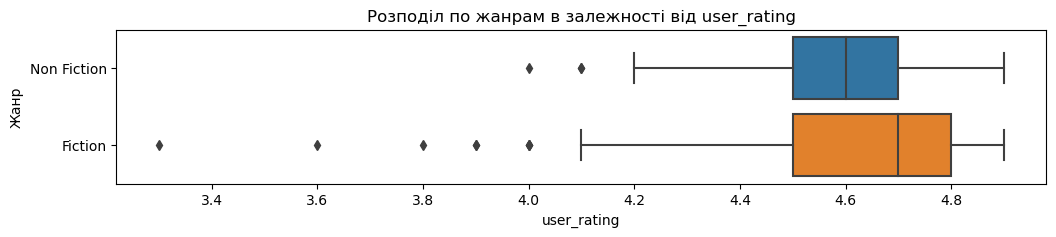

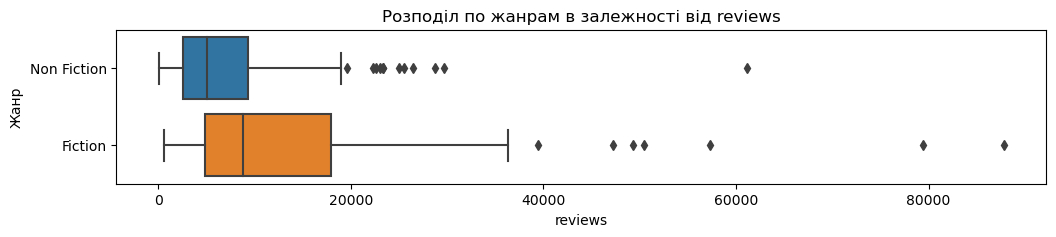

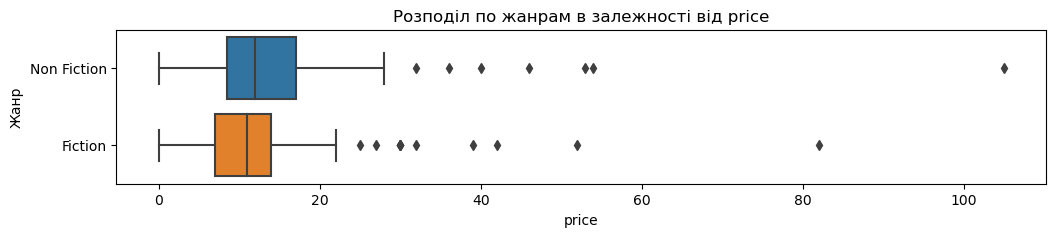

In [71]:
for col in books_data.columns[2:5]:
    plt.figure(figsize = (12,2))
    sns.boxplot(data =books_data,x = col,y ="genre")
    plt.title("Розподіл по жанрам в залежності від "+ col)
    plt.ylabel("Жанр")
    plt.xlabel(col)
    plt.show()

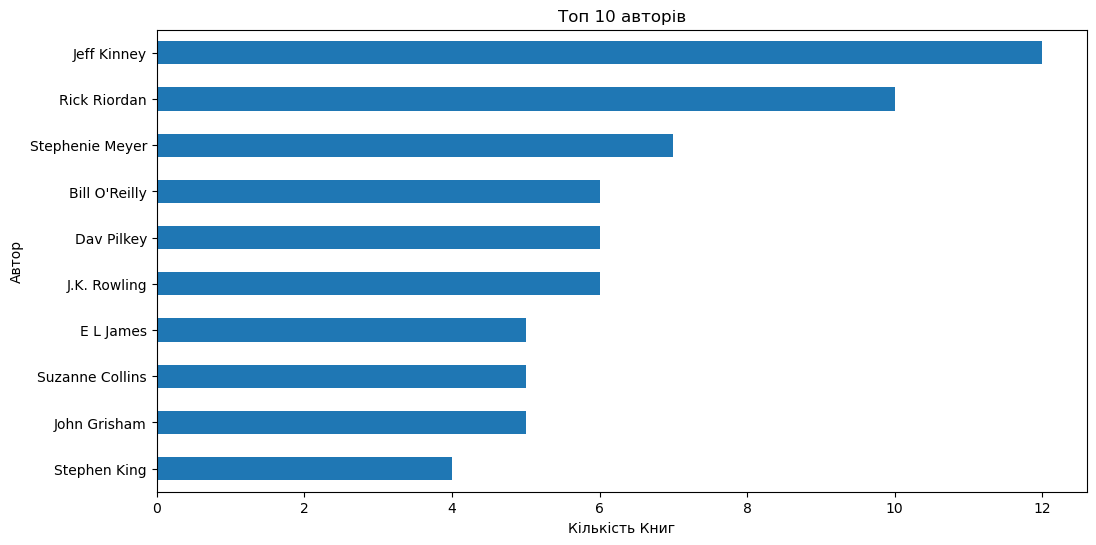

In [75]:
books_data["author"].value_counts()[:10].plot(kind= "barh",figsize =(12,6)).invert_yaxis()
plt.title("Топ 10 авторів")
plt.ylabel("Автор")
plt.xlabel('Кількість Книг')
plt.show()